# Performance and Timing

This is the scikit-learn half of a comparison to TMVA's operation.

 - We use 10 trees to train
 - 100K events (presumably)
 - [Event Dumper Job](http://higgs.phys.washington.edu:8080/job/CalRatio2016/job/MVADumpTrainingTuples/18/).
 - [Training Job](http://higgs.phys.washington.edu:8080/job/CalRatio2016/job/JetMVAClassifierTraining/191/).
 

## Initalization

In [1]:
from bdt_training_scikit_tools import plot_training_performance, load_default_samples, test_train_samples, prep_samples, default_training, calc_performance

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from math import sqrt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

## Load data

In [2]:
all_events = load_default_samples("18")
training, testing = test_train_samples(all_events)

BIB: 75226 events
Multijet: 100000 events
Signal: 100000 events


## Run Training
Run the default training with these events

In [3]:
training_events, training_class, training_weight = prep_samples(training[0], training[1], training[2])
testing_events, testing_class, testing_weight = prep_samples(testing[0], testing[1], testing[2])

In [4]:
%%time
bdt = default_training(training_events, training_weight, training_class)

Wall time: 51.5 s


## Performance Training Performance
Check to make sure the training worked well - there isn't an issue with over training, that the number of trees used were enough, etc.

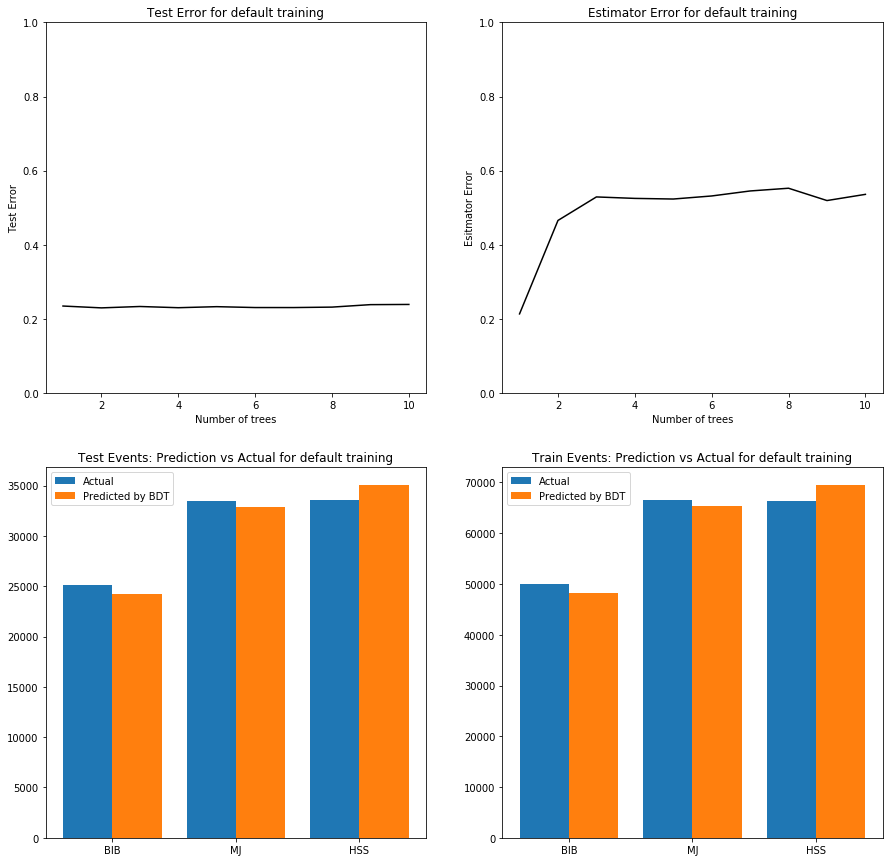

In [5]:
plot_training_performance(bdt, training, testing, "default")

## Seperation Performance
Look at how good this training is

In [7]:
d = calc_performance(bdt, testing)
pd.DataFrame({'DefaultTraining':d})

,DefaultTraining
BIBBack,7.143184
BIBEff,0.442461
BIBSsqrtB,4.526578
BIBinBIB,12.098066
BIBinHSS,1.606168
BIBinMJ,13.638435
HSSBack,2.200223
HSSEff,0.960356
HSSSsqrtB,22.151481
HSSinBIB,0.777371
